# ML:Credit Card Fraud detection


In [ ]:
#import basic libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [ ]:
#load dataset creditcard.csv
df=pd.read_csv("/content/drive/MyDrive/Machin learning/creditcard.csv") 
#view first 5column
pd.set_option("display.max_columns",None) #to display all column
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

#there are 31 columns and 284807 records


#stastical summary of numeric feature

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
#check null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#no null values
#check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<b>dataset is clean lets perform the EDA now

#EDA


In [ ]:
# check Imbalance in the target variable
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

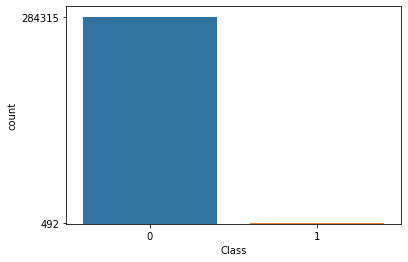

In [ ]:
#visulize 
sns.countplot(data=df,x="Class")
c=df["Class"].value_counts()
plt.yticks(c)
plt.show()

In [ ]:
fraud_per=492/284807*100
print(f"fraud_precentage:{fraud_per}")

fraud_precentage:0.1727485630620034


<b>Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced. Lets first apply our models without balancing it and if we don’t get a good accuracy then we can find a way to balance this dataset. But first, let’s implement the model without it and will balance the data only if needed.</b>

In [ ]:
#check how much average amount withdra during fraud transaction
fraud=df[df["Class"]==1]
valid=df[df["Class"]==0]
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
#check how much average amount withdra during valid transaction
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

 <b>the average Money transaction for the fraudulent ones is more as compared to valid transction.</b>

#Univarite analysis

--------------------- Time ----------------------


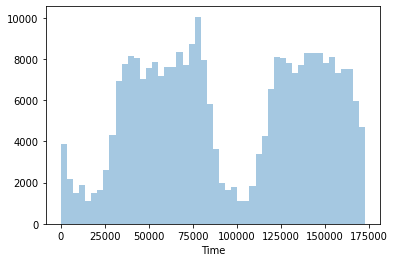

--------------------- V1 ----------------------


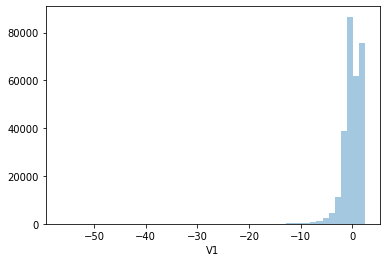

--------------------- V2 ----------------------


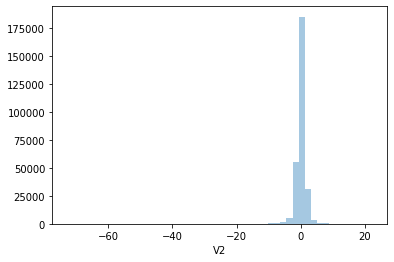

--------------------- V3 ----------------------


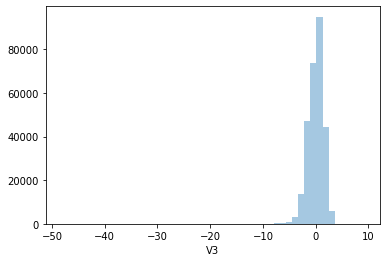

--------------------- V4 ----------------------


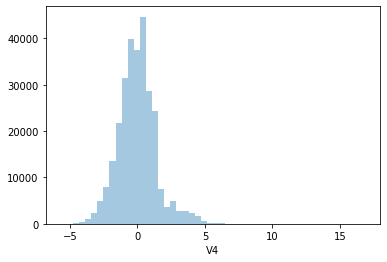

--------------------- V5 ----------------------


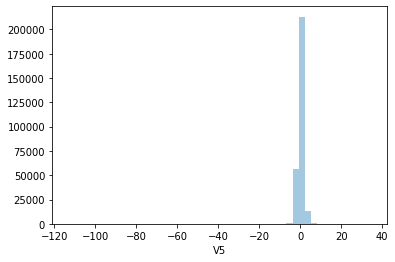

--------------------- V6 ----------------------


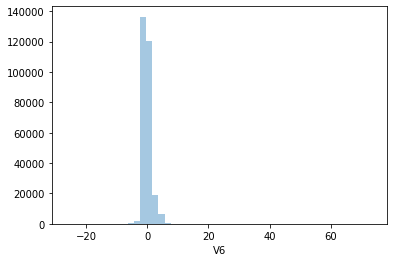

--------------------- V7 ----------------------


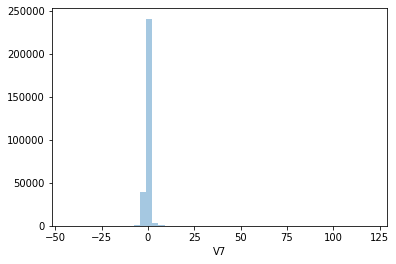

--------------------- V8 ----------------------


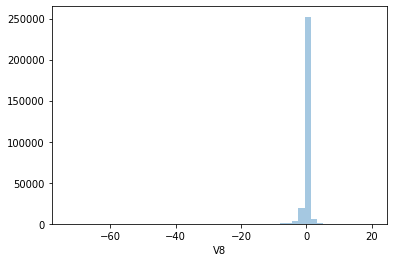

--------------------- V9 ----------------------


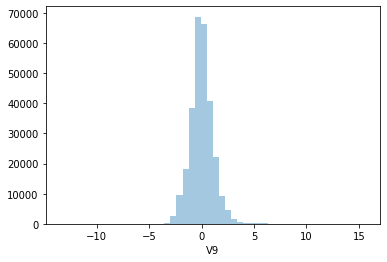

--------------------- V10 ----------------------


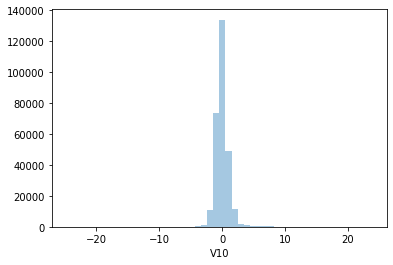

--------------------- V11 ----------------------


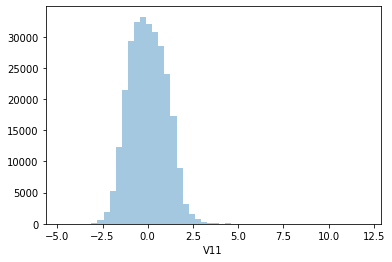

--------------------- V12 ----------------------


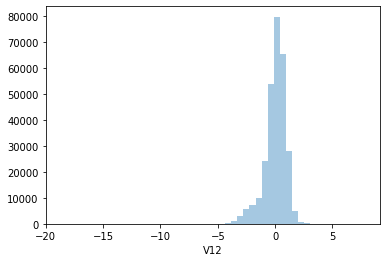

--------------------- V13 ----------------------


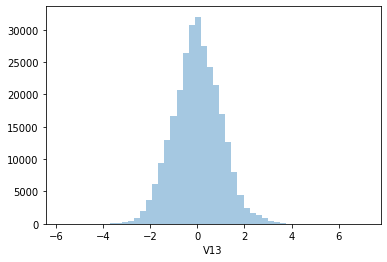

--------------------- V14 ----------------------


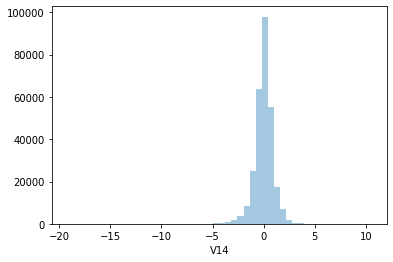

--------------------- V15 ----------------------


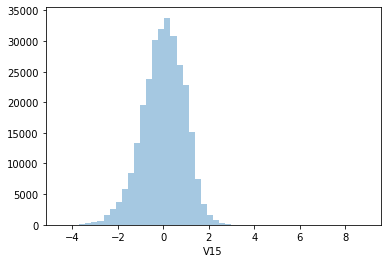

--------------------- V16 ----------------------


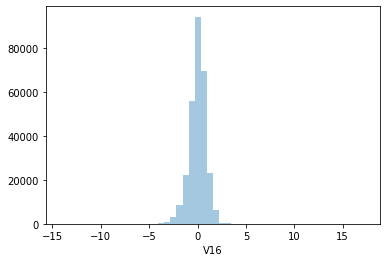

--------------------- V17 ----------------------


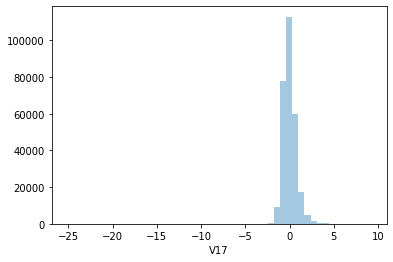

--------------------- V18 ----------------------


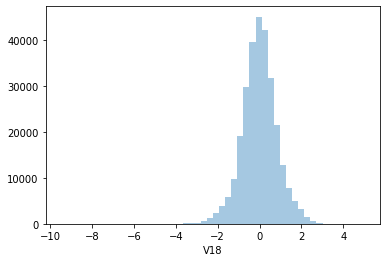

--------------------- V19 ----------------------


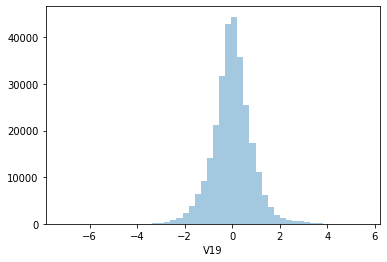

--------------------- V20 ----------------------


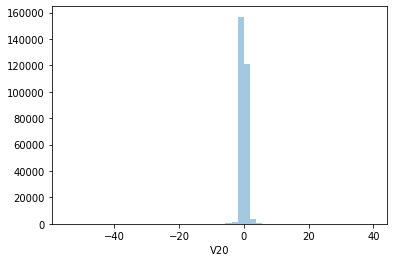

--------------------- V21 ----------------------


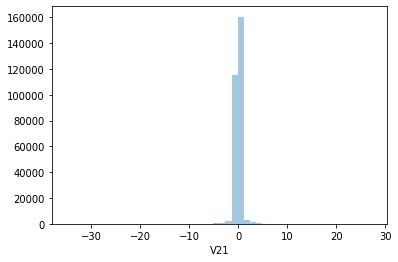

--------------------- V22 ----------------------


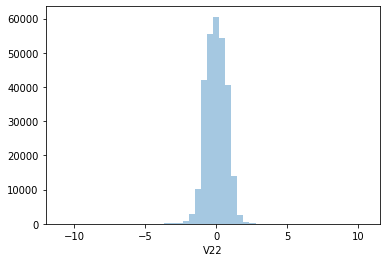

--------------------- V23 ----------------------


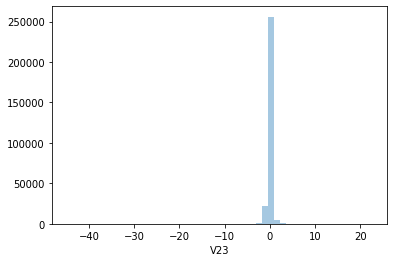

--------------------- V24 ----------------------


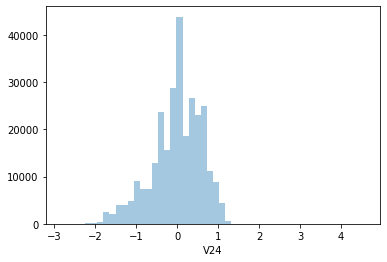

--------------------- V25 ----------------------


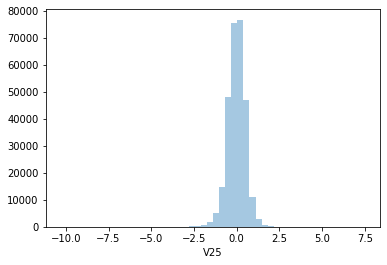

--------------------- V26 ----------------------


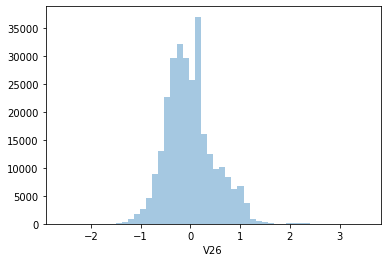

--------------------- V27 ----------------------


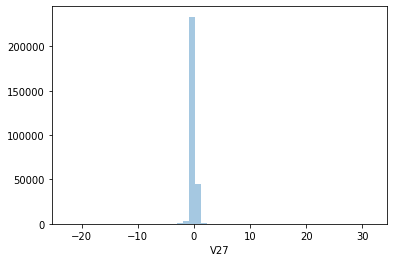

--------------------- V28 ----------------------


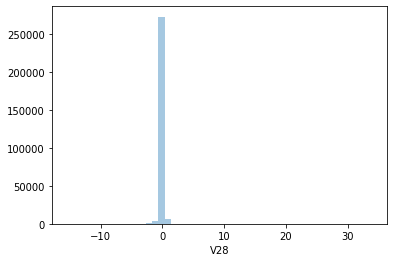

--------------------- Amount ----------------------


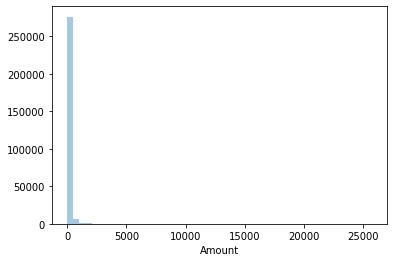

--------------------- Class ----------------------


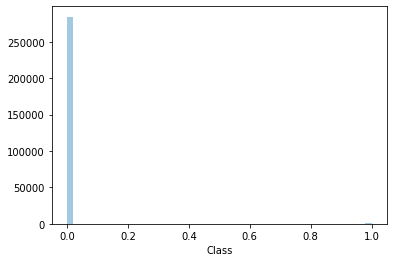

In [ ]:
for col in df:
  print('---------------------',col,'----------------------')
  sns.distplot(a=df[col],kde=False)
  plt.show()

-------------- Time ----------------


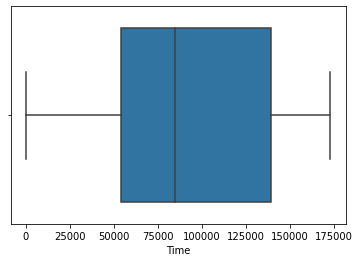

-------------- V1 ----------------


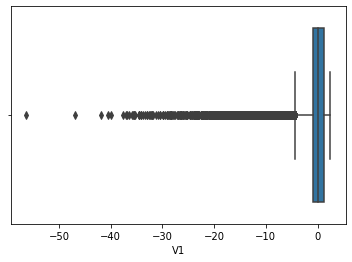

-------------- V2 ----------------


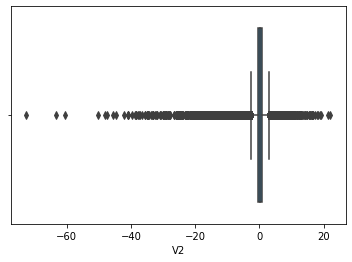

-------------- V3 ----------------


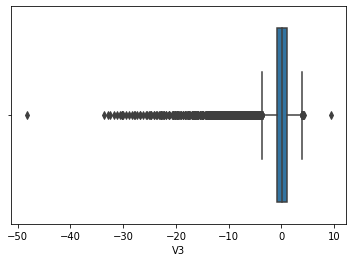

-------------- V4 ----------------


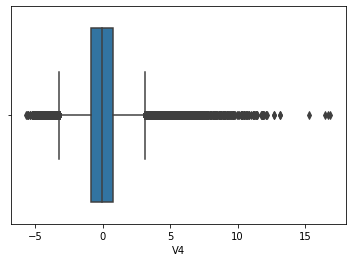

-------------- V5 ----------------


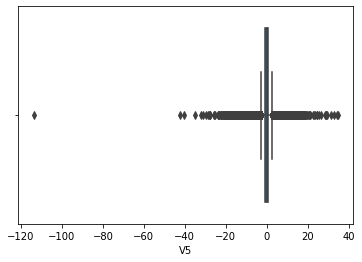

-------------- V6 ----------------


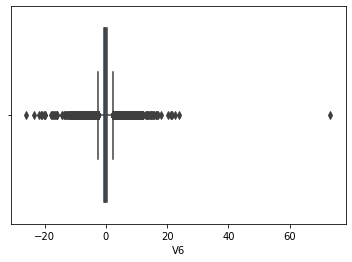

-------------- V7 ----------------


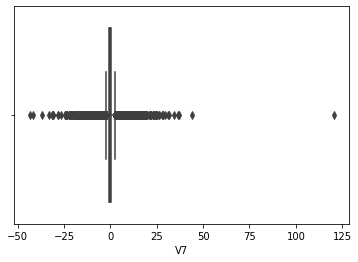

-------------- V8 ----------------


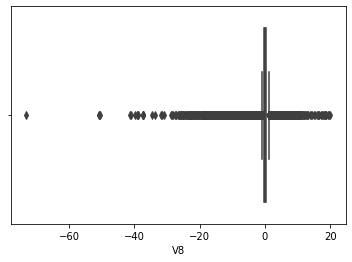

-------------- V9 ----------------


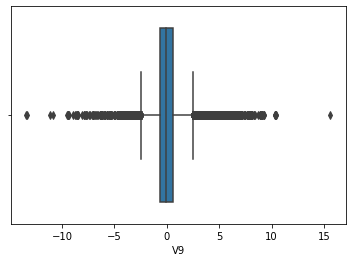

-------------- V10 ----------------


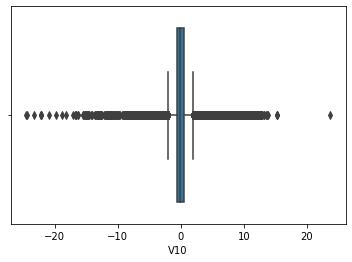

-------------- V11 ----------------


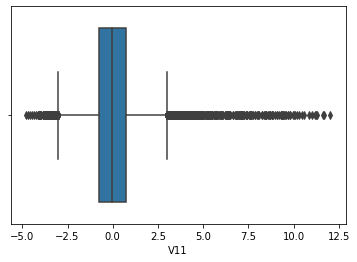

-------------- V12 ----------------


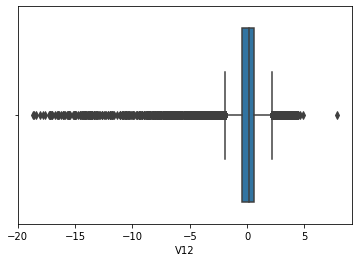

-------------- V13 ----------------


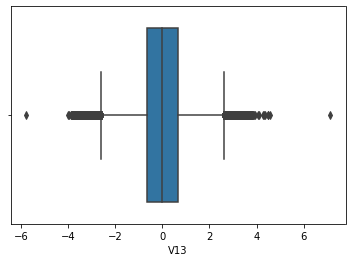

-------------- V14 ----------------


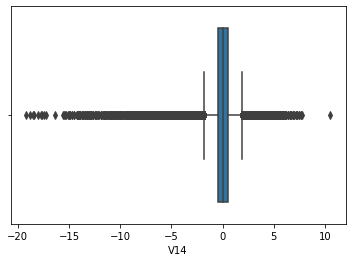

-------------- V15 ----------------


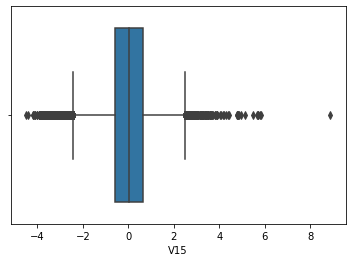

-------------- V16 ----------------


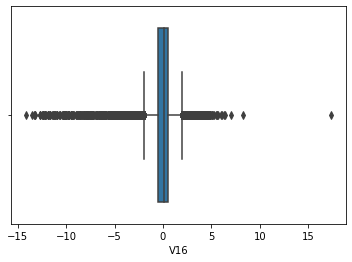

-------------- V17 ----------------


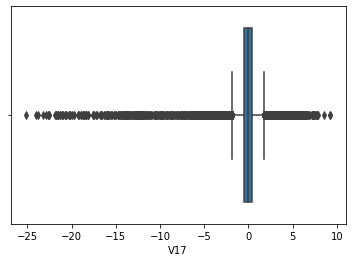

-------------- V18 ----------------


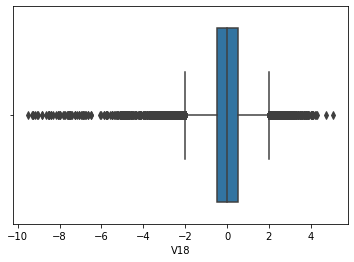

-------------- V19 ----------------


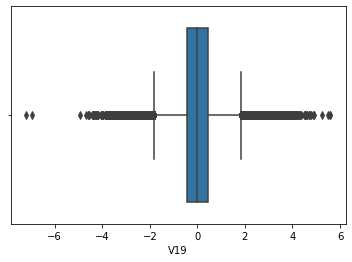

-------------- V20 ----------------


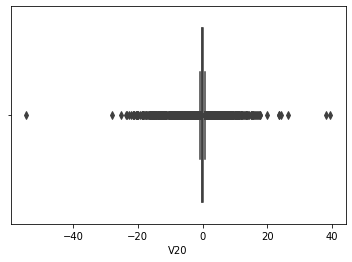

-------------- V21 ----------------


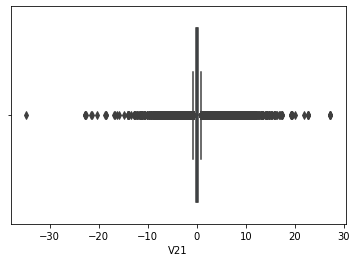

-------------- V22 ----------------


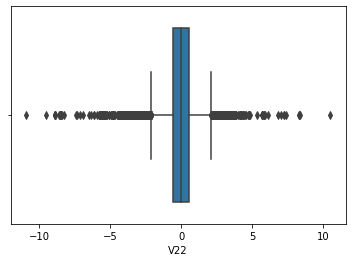

-------------- V23 ----------------


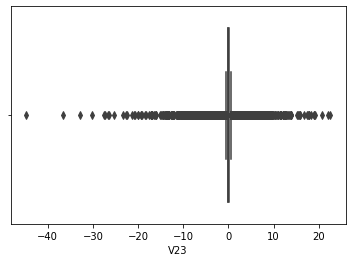

-------------- V24 ----------------


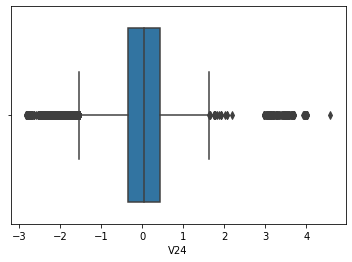

-------------- V25 ----------------


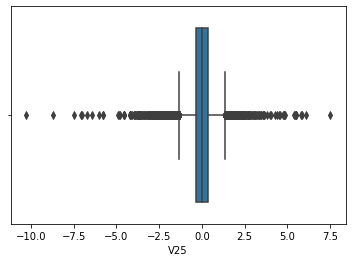

-------------- V26 ----------------


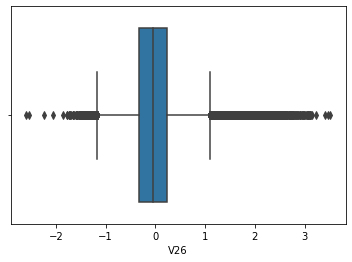

-------------- V27 ----------------


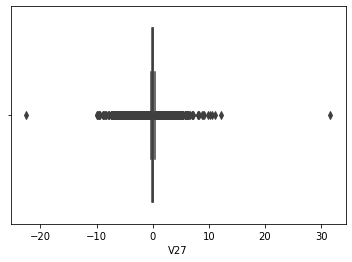

-------------- V28 ----------------


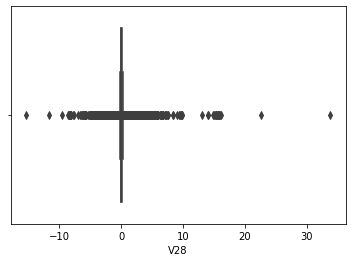

-------------- Amount ----------------


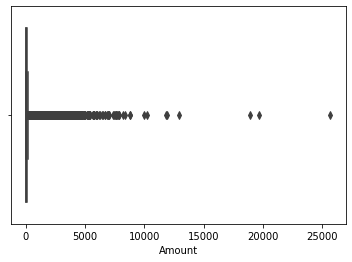

-------------- Class ----------------


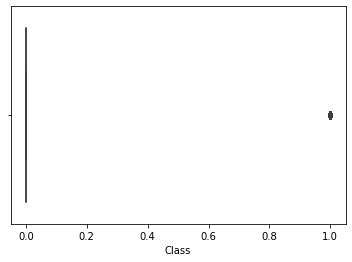

In [ ]:
for col in df:
  print('--------------',col,'----------------')
  sns.boxplot(x=df[col])
  plt.show()

In [ ]:
from scipy.stats import skew

Time skewness: -0.03556743068120296


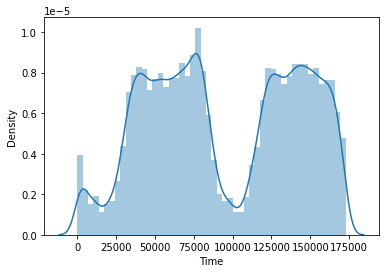

V1 skewness: -3.2806500243599563


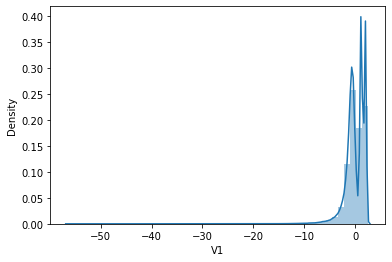

V2 skewness: -4.624841215356954


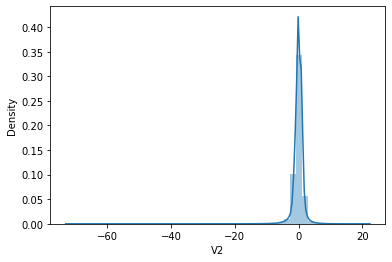

V3 skewness: -2.2401436419416556


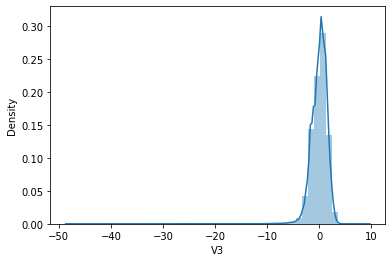

V4 skewness: 0.6762885361363855


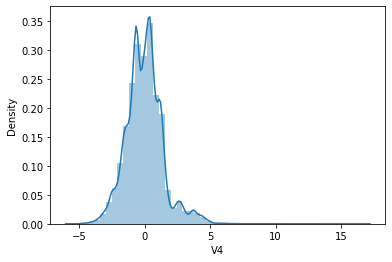

V5 skewness: -2.4258887193785577


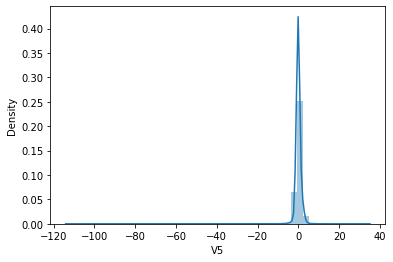

V6 skewness: 1.8265710448869008


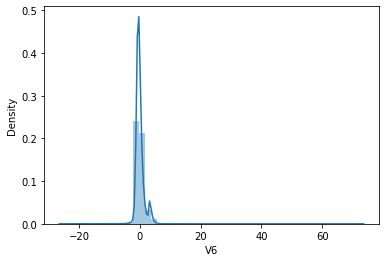

V7 skewness: 2.5538939666831117


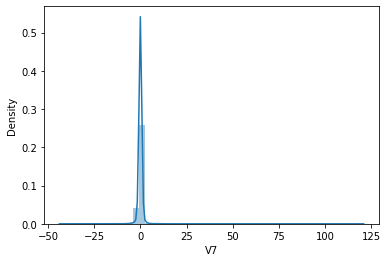

V8 skewness: -8.521899311980174


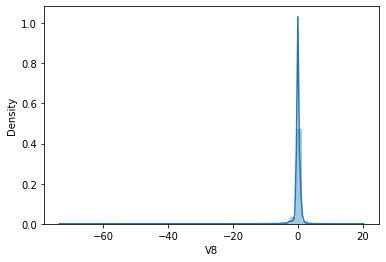

V9 skewness: 0.5546768505565418


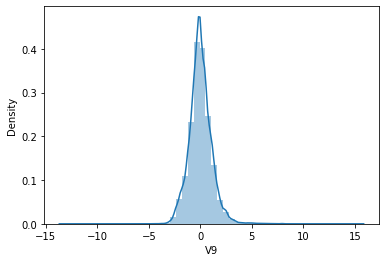

V10 skewness: 1.1871343376109698


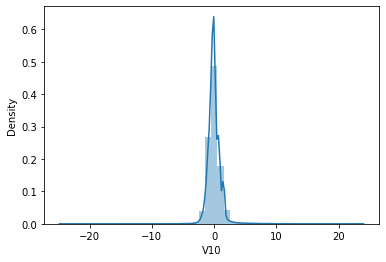

V11 skewness: 0.3565039778679557


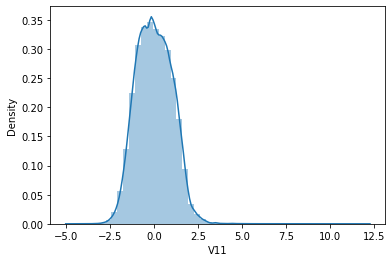

V12 skewness: -2.2783889356830715


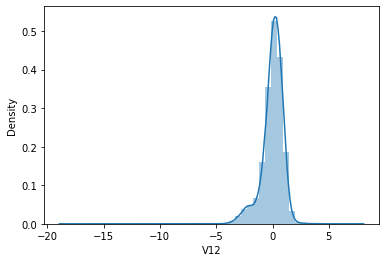

V13 skewness: 0.0652331143394307


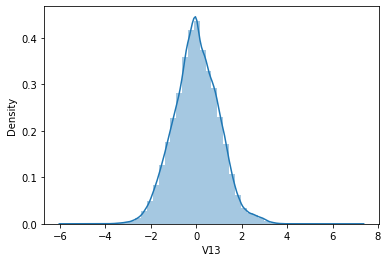

V14 skewness: -1.9951653322115102


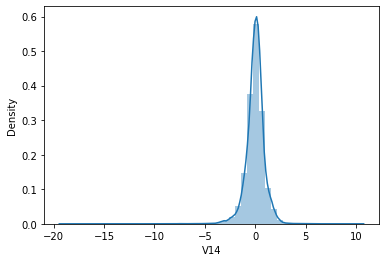

V15 skewness: -0.30842135775467616


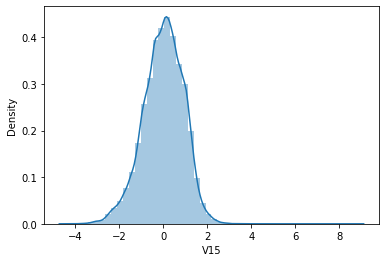

V16 skewness: -1.1009604775565411


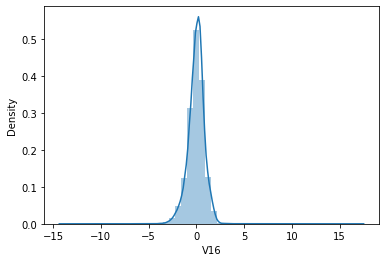

V17 skewness: -3.8448942237357953


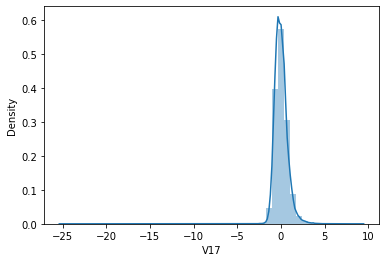

V18 skewness: -0.25987889937453285


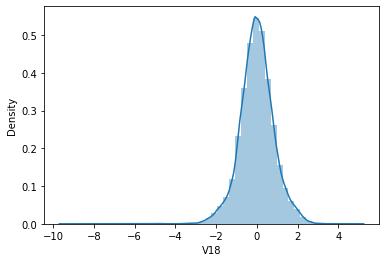

V19 skewness: 0.10919118489771402


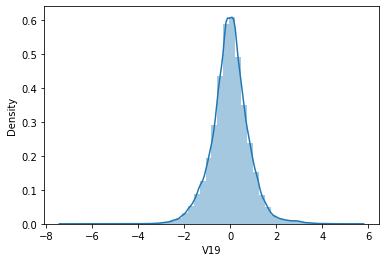

V20 skewness: -2.0371445699300104


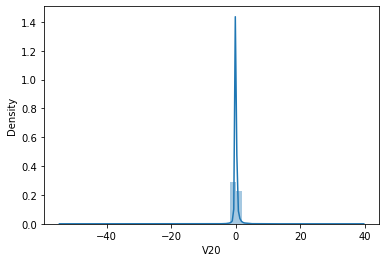

V21 skewness: 3.5929722697554753


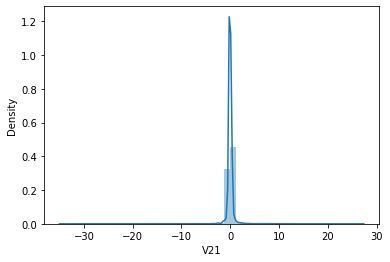

V22 skewness: -0.21325649967250146


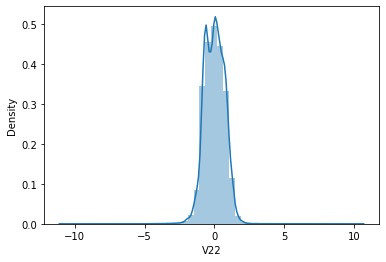

V23 skewness: -5.875109397316075


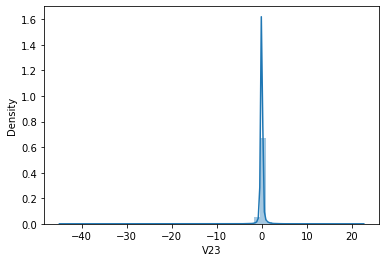

V24 skewness: -0.5524963913014509


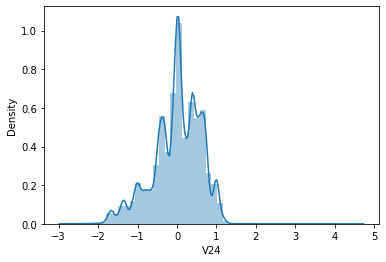

V25 skewness: -0.4157904004474158


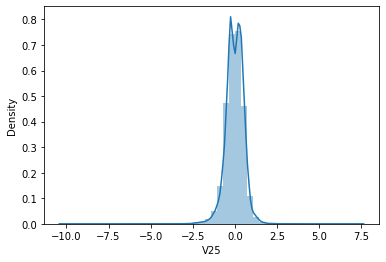

V26 skewness: 0.5766895799228516


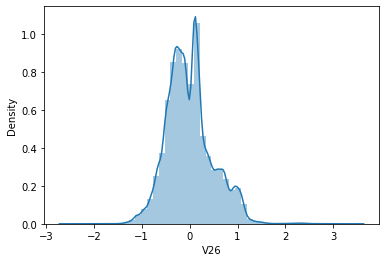

V27 skewness: -1.1702027792556084


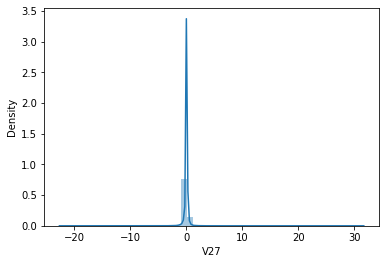

V28 skewness: 11.19203224646587


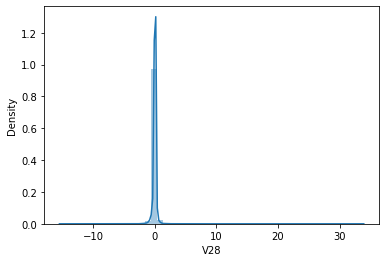

Amount skewness: 16.97763503663315


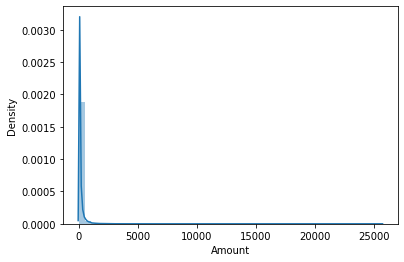

Class skewness: 23.99745292182408


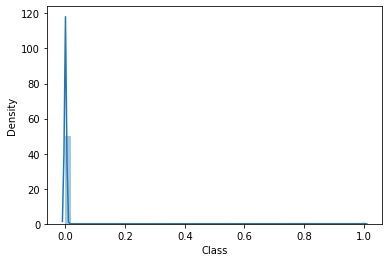

In [ ]:
for col in df:
  print(col,'skewness:',skew(df[col]))
  sns.distplot(a=df[col])
  plt.show()

#Bi-variate analysis

Time


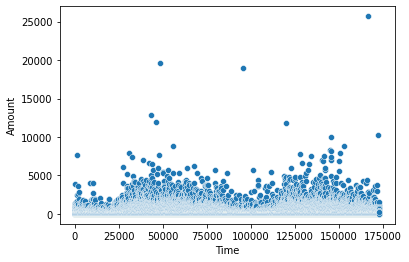

V1


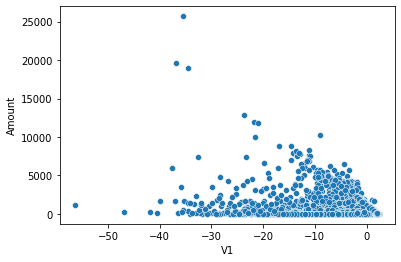

V2


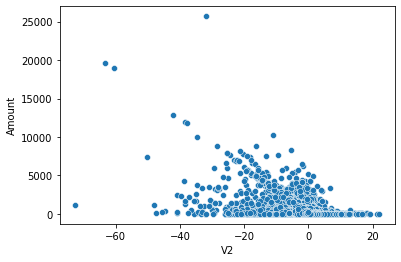

V3


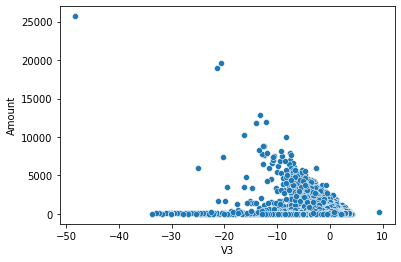

V4


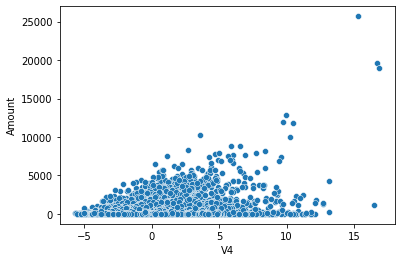

V5


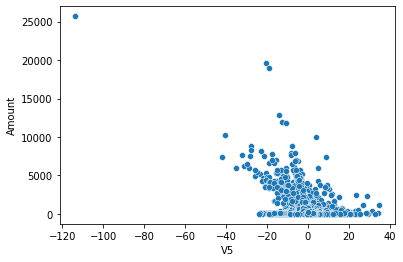

V6


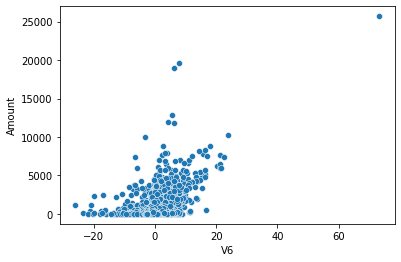

V7


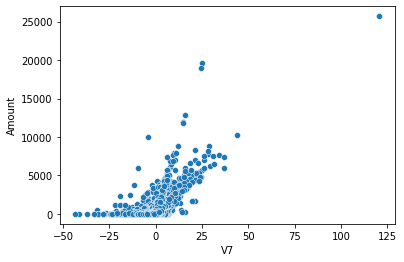

V8


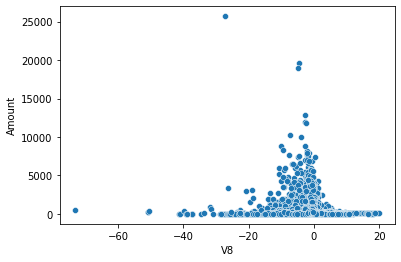

V9


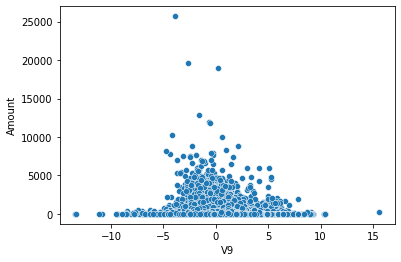

V10


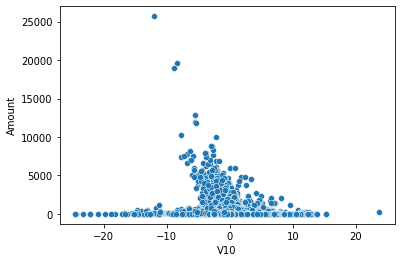

V11


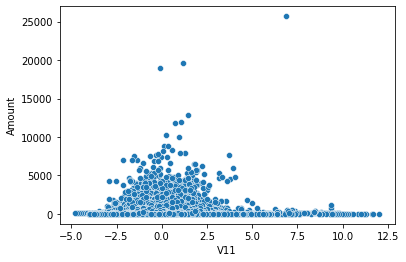

V12


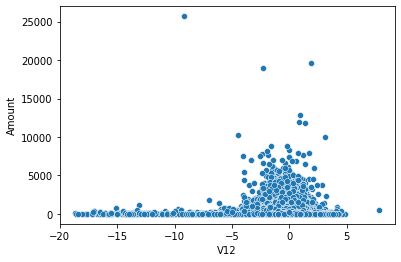

V13


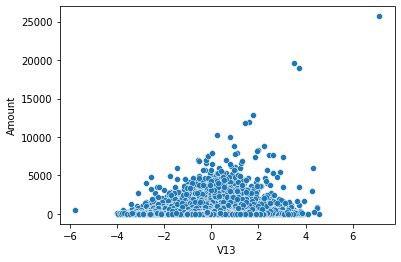

V14


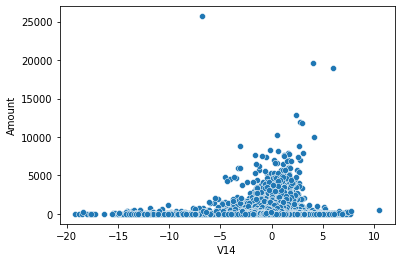

V15


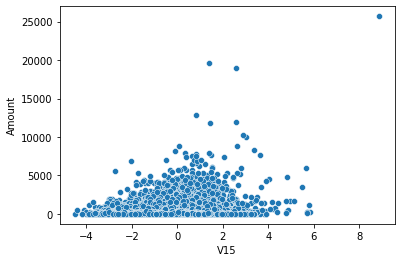

V16


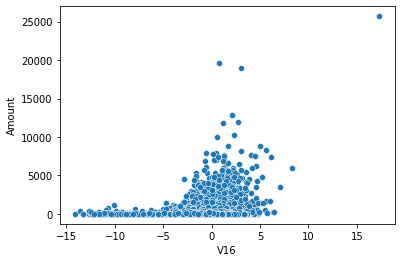

V17


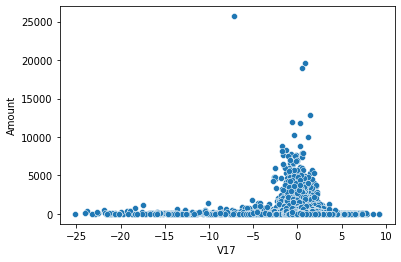

V18


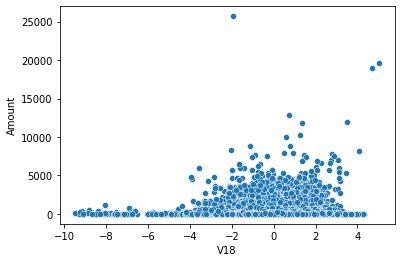

V19


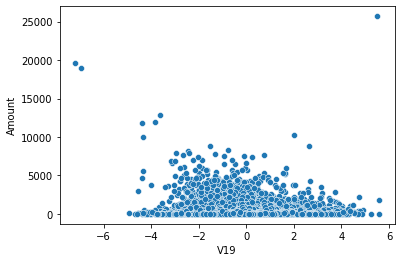

V20


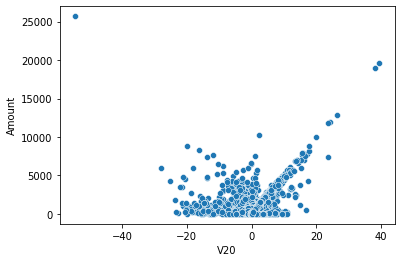

V21


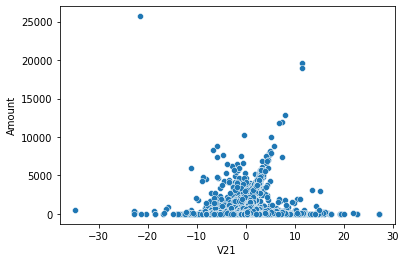

V22


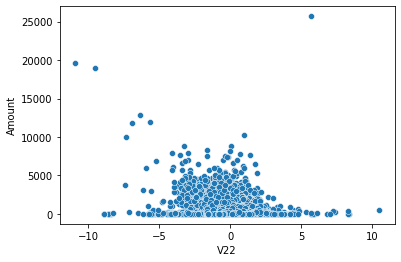

V23


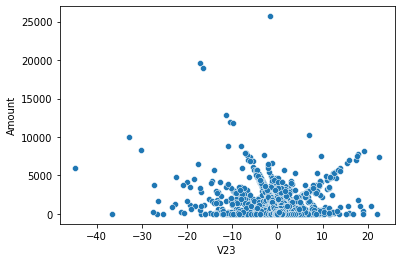

V24


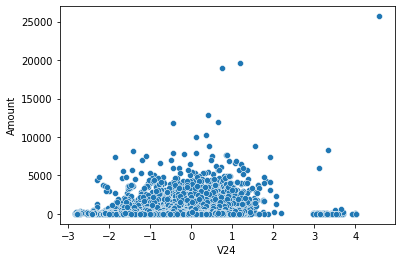

V25


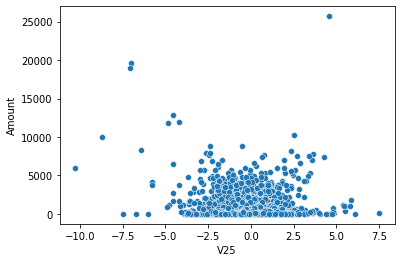

V26


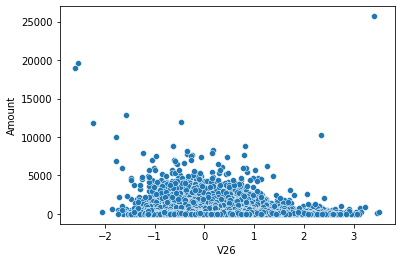

V27


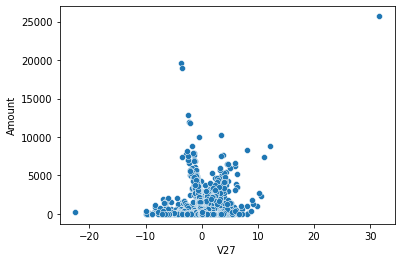

V28


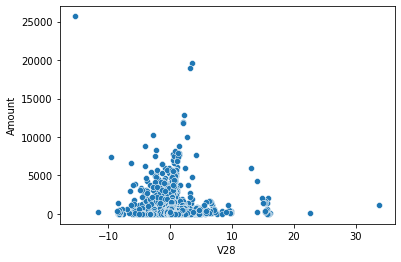

Amount


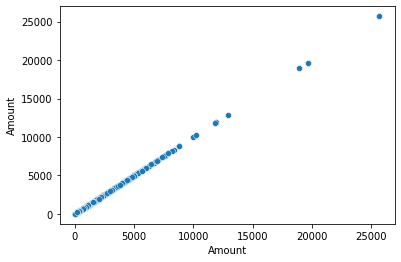

Class


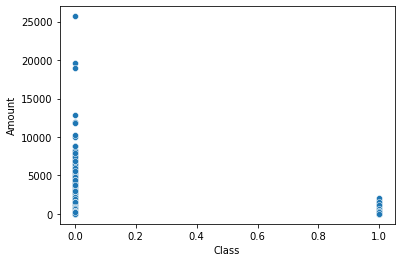

In [ ]:
for col in df:
  print(col)
  sns.scatterplot(df[col],df['Amount'])
  plt.show()

In [ ]:
#check correlation of features with target here (Class)
# 0.5 to 1 means good positive correlation
#-0.5 to -1 means good negative correlation
df.corr() #inbuilt method

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

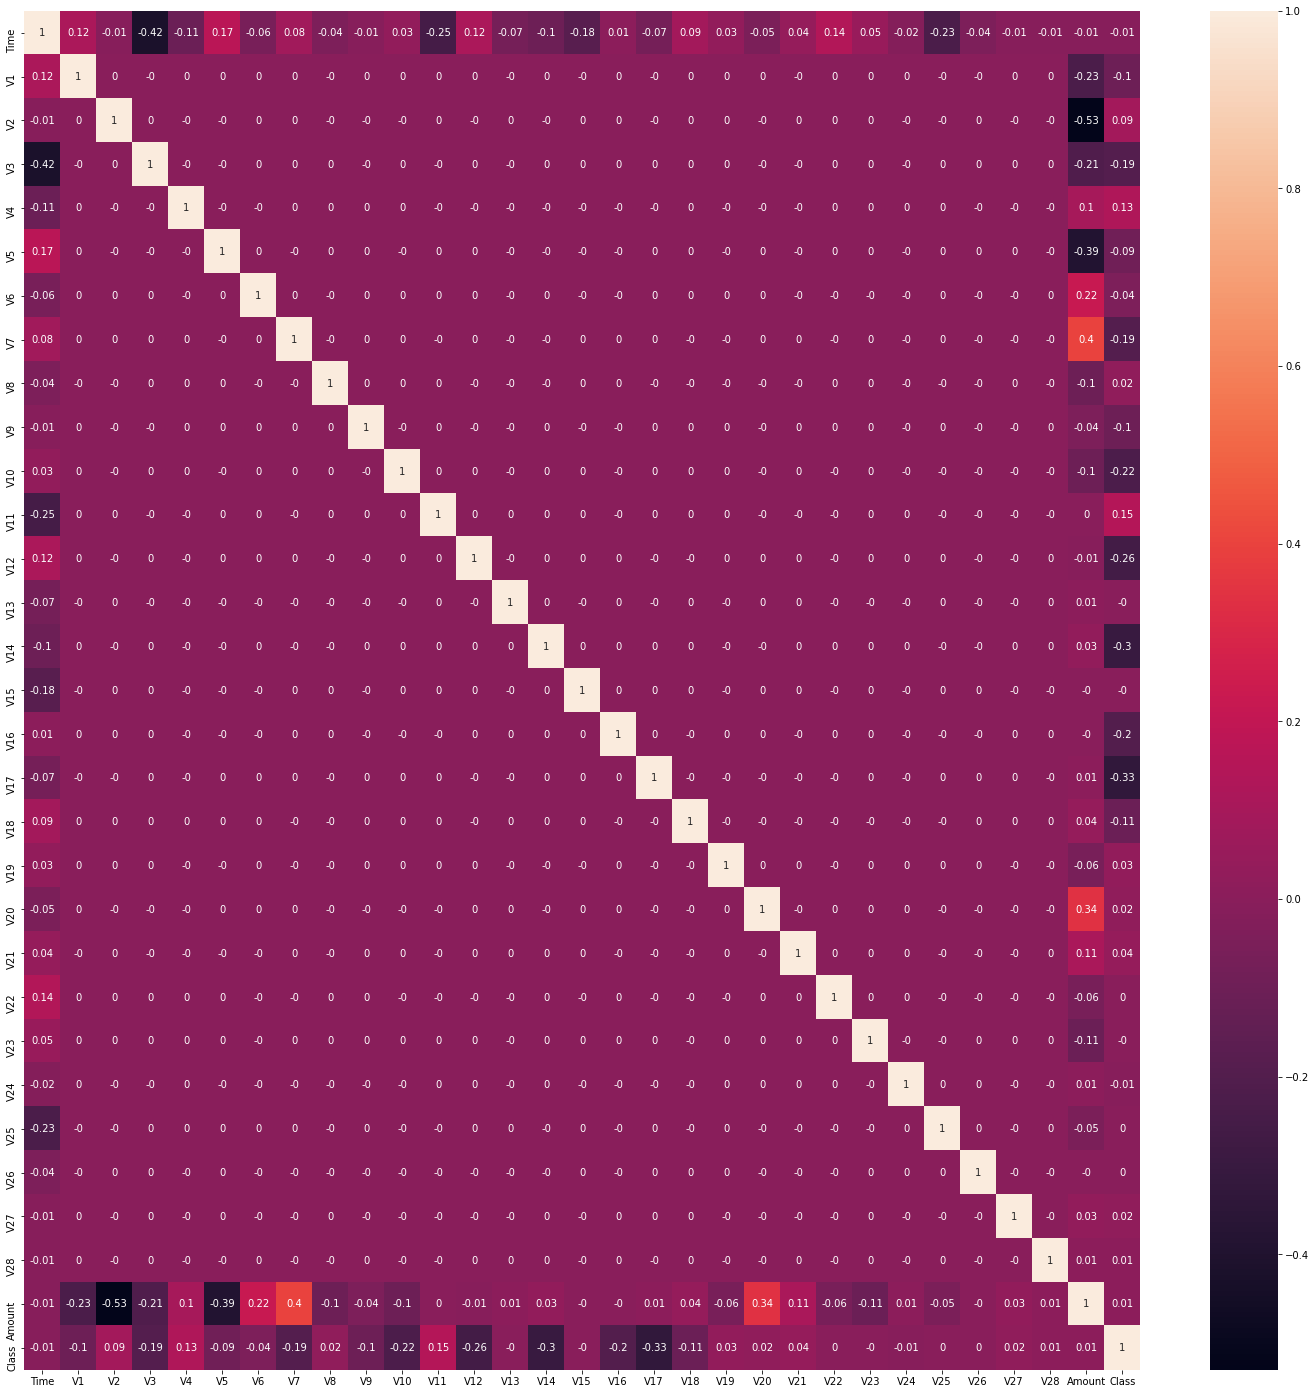

In [ ]:
#visulise
plt.figure(figsize=(25,25))
sns.heatmap(df.corr().round(2),annot=True)
plt.show()

### In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other
### V2 and V5 are highly negatively correlated with the feature called Amount. We also see some positive correlation with V7,V20 and Amount

#correlation between Amount and V2 iS -0.53 good negative corr
#correlation between Amount and V5 iS -0.39 negative corr
#correlation between Amount and V7 iS 0.4 positive corr
#correlation between Amount and V20 iS 0.34 positive corr



In [ ]:
for col in df:
  d=df[df[col]<0]
  print(col)
  print(d)
  

Time
Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []
V1
            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
...          ...        ...        ...       ...       ...       ...   
284799  172783.0  -1.775135  -0.004235  1.189786  0.331096  1.196063   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  1727

#There is negative values in features so cant apply sqrt or log transformation to reduce skewness in data


#**separate Independent variable(input variable) X and dependent variable Y(target/output)**

In [ ]:


X=df.drop("Class",axis=1) #to store all inputs hold in X variable apart from
#Class
Y=df["Class"]

#Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit_transform(X)

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

**Split our dataset in train test of 70% & 30%**

In [ ]:

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=1)

#create function so we can train our model with different diffirent algorithm to get best of it

In [ ]:

def create_model(model):
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(classification_report(Y_test,Y_pred))
    print("Confusion_matrix:")
    print(confusion_matrix(Y_test,Y_pred))
    return model


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression


#create base model

In [ ]:
#first train the model with basic algorithm LogisticRegression
#create object of LogisticRegression
lr=LogisticRegression()

#call function
lr=create_model(lr)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.70      0.63      0.66       135

    accuracy                           1.00     85443
   macro avg       0.85      0.81      0.83     85443
weighted avg       1.00      1.00      1.00     85443

Confusion_matrix:
[[85271    37]
 [   50    85]]


In [ ]:
#now we use RandomForestClassifier which better than simple decision tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#create object of RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=45,max_features=4,random_state=1)
#n_estimators number of 45 and max_features=4
#it create 45 decision tree with this 4 feature and take average of it to predict model


#RandomForest

In [ ]:
#call function
create_model(rfc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.91      0.76      0.83       135

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion_matrix:
[[85298    10]
 [   32   103]]


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=45,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=30)

In [ ]:
create_model(gbc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.67      0.21      0.33       135

    accuracy                           1.00     85443
   macro avg       0.84      0.61      0.66     85443
weighted avg       1.00      1.00      1.00     85443

Confusion_matrix:
[[85294    14]
 [  106    29]]


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=30,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=30,reg_alpha=1)
#reg_alpha =1 it is
#automatic handle overfitting situation alpha or lambda means hyperparameter
#and handle the outlier automatic
#n_estimators=100 means no. of iterations can be <=100


#XGboost

In [ ]:
create_model(xgb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.86      0.74      0.80       135

    accuracy                           1.00     85443
   macro avg       0.93      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Confusion_matrix:
[[85292    16]
 [   35   100]]


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## by using extream boost and random  forest classifier we get good F1 score as comapred to other model without balancing the dataset


## now we first balance the dataset and then train the model
### for balancing dataset we need imblearn package


#Here No : Majority class   and yes : Minority class  means data is imbalance
#so we have to balance the output variable
# to Balance the target variable then used sampling technique : -
#There are 2 types of sampling technique : -
# 1. Random Under Sampling
# 2. Random over sampling

<b>If you have basically reducing the majority class that is known as Under sampling and if you are increasing the minority class that is known as over sampling</b>

In [ ]:
#If you have basically reducing the majority class that is known as Under sampling 
from imblearn.under_sampling import RandomUnderSampler

#Undersampling

In [ ]:
#if converts majority class to minority class  then use RandomUnderSampler 
#Here in this dataset : Majority class : No  and Minority class : Yes
#create object of  RandomUnderSampler() class
rus=RandomUnderSampler()

In [ ]:
#we have target : 70% : Y_train means training data and 30# : Y_test means testing data
pd.Series(Y_train).value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [ ]:
#fit_sample() inbuilt function which define RandomUnderSampler class and pass training data
#we have X_train and Y_train (70%)
X_sample_train,Y_sample_train = rus.fit_resample(X_train,Y_train) 

In [ ]:
#check 
pd.Series(Y_sample_train).value_counts()

1    357
0    357
dtype: int64

In [ ]:
#we train the model with the help of Logistic regression after apply randomundersampler
#we create the object of Logistic Regression class
lr=LogisticRegression()

In [ ]:
#train : use fit()
#test : predict()
#classification problem : report generate : use classification_report()
#user defined function create
def create_model1(model):
    model.fit(X_sample_train,Y_sample_train)#we train the model
    y_pred=model.predict(X_test) #test
    print(classification_report(Y_test,y_pred))
    print("Confusion Matrix : ")
    print(confusion_matrix(Y_test,y_pred))
    return model

In [ ]:

#call function
create_model1(lr)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85308
           1       0.04      0.86      0.08       135

    accuracy                           0.97     85443
   macro avg       0.52      0.91      0.53     85443
weighted avg       1.00      0.97      0.98     85443

Confusion Matrix : 
[[82715  2593]
 [   19   116]]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Apply decisionTreeClassifier : this is select algorithm of classification ,Its help to select imp
#features to predict the o/p , not done manually data analysis to slect imp features
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#create the object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier(max_depth=6) #by default gini index method to select imp features

#call function create_model1
dt1=create_model1(dt1)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85308
           1       0.03      0.87      0.05       135

    accuracy                           0.95     85443
   macro avg       0.51      0.91      0.51     85443
weighted avg       1.00      0.95      0.97     85443

Confusion Matrix : 
[[81118  4190]
 [   18   117]]


In [ ]:

dt1.feature_importances_ # to show reduction of all input features

array([0.        , 0.        , 0.        , 0.        , 0.04549278,
       0.        , 0.        , 0.01230137, 0.        , 0.        ,
       0.00999687, 0.03070052, 0.03169173, 0.00468603, 0.79590722,
       0.00576742, 0.        , 0.02248906, 0.        , 0.        ,
       0.        , 0.03430243, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00666458])

In [ ]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [ ]:
#create object of RandomForestClassifier class
rfc=RandomForestClassifier(n_estimators=75,max_features=5,random_state=1)#here n_estimators is a parameter
#which show no. of decisiontree (how many decisiontree) and max_features means max imp input select
X.shape

(284807, 30)

In [ ]:

#call function
create_model1(rfc)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85308
           1       0.09      0.85      0.17       135

    accuracy                           0.99     85443
   macro avg       0.55      0.92      0.58     85443
weighted avg       1.00      0.99      0.99     85443

Confusion Matrix : 
[[84175  1133]
 [   20   115]]


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
#create the object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(n_estimators=100) #no. of iterations <=100 use algo. decisiontreeclassifier

create_model1(gbc)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85308
           1       0.06      0.87      0.12       135

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Confusion Matrix : 
[[83572  1736]
 [   18   117]]


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#Random Over Sampling : - we increase the minority class means creates the duplicate rows of yes class (minority)
#class and equal to majority class means no class 
#If we are increasing the minority class that is known as over sampling .
#call class inbuilt class RandomOverSampling : - define in imblearn package 

from imblearn.over_sampling import RandomOverSampler

#Oversampling

In [ ]:
#create object of  RandomOverSampler() class
ros = RandomOverSampler()

In [ ]:
#fit_sample() inbuilt function which define RandomOverSampler class and pass training data
#we have X_train and Y_train (70%)
X_sample_train1,Y_sample_train1 = ros.fit_resample(X_train,Y_train) 

In [ ]:
#check 
pd.Series(Y_sample_train1).value_counts()

1    199007
0    199007
dtype: int64

In [ ]:
#Testing data 30% 
pd.Series(Y_test).value_counts() #this is unbalance 

0    85308
1      135
Name: Class, dtype: int64

In [ ]:
#fit_sample() inbuilt function which define RandomUnderSampler class and pass testing data
#we have X_test and Y_test (70%)
X_sample_test1,Y_sample_test1 = ros.fit_resample(X_test,Y_test) 

In [ ]:
#Testing data 30% 
pd.Series(Y_sample_test1).value_counts() 

1    85308
0    85308
dtype: int64

In [ ]:
#user defined function create
def create_model2(model):
    model.fit(X_sample_train1,Y_sample_train1)#we train the model
    y_pred=model.predict(X_sample_test1) #test
    print(classification_report(Y_sample_test1,y_pred))
    print("Confusion Matrix : ")
    print(confusion_matrix(Y_sample_test1,y_pred))
    return model

In [ ]:
#we train the model with the help og Logistic regression after apply randomOverrsampler
#we create the object of Logistic Regression class
#Use base line model of classification algorithm : Logistic Regression
lr1=LogisticRegression()

In [ ]:
#call function
create_model2(lr1)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     85308
           1       0.96      0.87      0.92     85308

    accuracy                           0.92    170616
   macro avg       0.92      0.92      0.92    170616
weighted avg       0.92      0.92      0.92    170616

Confusion Matrix : 
[[82383  2925]
 [10764 74544]]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#create the object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier() #by default gini index method to select imp features
#call function
create_model2(dt2)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     85308
           1       1.00      0.68      0.81     85308

    accuracy                           0.84    170616
   macro avg       0.88      0.84      0.84    170616
weighted avg       0.88      0.84      0.84    170616

Confusion Matrix : 
[[85276    32]
 [27088 58220]]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#create the object of DecisionTreeClassifier class
dt3=DecisionTreeClassifier(max_depth=5) #by default gini index method to select imp features
#call function
create_model2(dt3)

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     85308
           1       0.99      0.83      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

Confusion Matrix : 
[[84721   587]
 [14621 70687]]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#create the object of AdaBoostClassifier 
ada=AdaBoostClassifier(n_estimators=10) #n_estimators=100 : this is parameter (it is used for iteration)
#we define 100 , can be <=100 ,adaboost creates a decisionstump(decisiontree)

In [ ]:
#call function
create_model2(ada)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     85308
           1       0.96      0.90      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

Confusion Matrix : 
[[81925  3383]
 [ 8158 77150]]


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=10, random_state=None)

In [ ]:
#create the object of GradientBoostingClassifier class
gbc1=GradientBoostingClassifier(n_estimators=30) #no. of iterations <=100 use algo. decisiontreeclassifier

In [ ]:
#call function
create_model2(gbc1)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.86      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.92    170616
weighted avg       0.93      0.93      0.92    170616

Confusion Matrix : 
[[84487   821]
 [11952 73356]]


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=30,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#create the object of XGBClassifier class
xgb1=XGBClassifier(n_estimators=25,reg_alpha=1) #reg_alpha=1 means automatic handle overfitting situation and
#outlier 

#call function
create_model2(xgb1)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.86      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

Confusion Matrix : 
[[84688   620]
 [11986 73322]]


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=25, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#use SVM : support vector machine : - classification algorithm

In [ ]:


#1. Linear kernel function of SVM : means suppose data are linearly separatable with the help of 
#straight line 
#call class LinearSVC inbuilt class
from sklearn.svm import LinearSVC

#SVM(linear_kernel) on unbalance dataset

In [ ]:
#create the object of LinearSVC class
svc=LinearSVC(random_state=1) #hard marging
#call fun
create_model(svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.69      0.16      0.26       135

    accuracy                           1.00     85443
   macro avg       0.84      0.58      0.63     85443
weighted avg       1.00      1.00      1.00     85443

Confusion_matrix:
[[85298    10]
 [  113    22]]


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

#SVM(linear_kernel) on undersampling dataset

In [ ]:
#call fun
create_model1(svc)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     85308
           1       0.01      0.53      0.03       135

    accuracy                           0.94     85443
   macro avg       0.51      0.73      0.50     85443
weighted avg       1.00      0.94      0.97     85443

Confusion Matrix : 
[[79923  5385]
 [   64    71]]


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

#SVM(linear_kernel) on oversampling dataset

In [ ]:
#call fun
create_model2(svc)

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     85308
           1       0.95      0.82      0.88     85308

    accuracy                           0.89    170616
   macro avg       0.90      0.89      0.89    170616
weighted avg       0.90      0.89      0.89    170616

Confusion Matrix : 
[[81581  3727]
 [14976 70332]]


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

#conclusion:
<b>In real world we wont get balance data as out 100 90% transaction are not a fraud.
so considering real scenario Xgboost and Randomforest model is best to solve this problem.
#xgboost recall for 1: 74%
#RandomForest recall for 1: 76%
